In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


import numpy as np
import pandas as pd
import tensorflow as tf

import atecml.data
import atecml.fs

from contextlib import contextmanager
from tqdm import tqdm
from time import strftime,time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib
from concurrent.futures import ProcessPoolExecutor

plt.style.use('ggplot')

In [2]:
#训练集为过滤掉所有unknown标签的
num_cat = 16


train_df= atecml.data.load_train()
train_df.loc[train_df.label == 0, 'Fraud'] = 0
train_df.loc[train_df.label == 1, 'Fraud'] = 1
target ='Fraud'


predictors = [x for x in train_df.columns if x not in atecml.data.NOT_FEATURE_COLUMNS]


#F5可能是一个地域标签，聚类分组一下
train_df['f5'] =train_df['f5']//100

In [3]:
iv_list = {}
woe_table = {}
type_list = {}

nan_result = atecml.data.calc_iv(df=train_df,feature='NaN_LIST',target=target,category_num=64)        
niv = nan_result[0]
nwoe_df = nan_result[1]
nfeature_type = nan_result[2]
iv_list.update(niv)
woe_table.update(nwoe_df)
type_list.update(nfeature_type)

def mt_iv(feature):
    return atecml.data.calc_iv(df=train_df,feature=feature,target=target,category_num=num_cat)

with ProcessPoolExecutor(max_workers=40) as pool:
    for pool_result in pool.map(mt_iv,predictors):
        iv = pool_result[0]
        woe_df = pool_result[1]
        feature_type = pool_result[2]
        iv_list.update(iv)
        woe_table.update(woe_df)
        type_list.update(feature_type)

[2018-07-05 20:14:05][WoE/IV Calculation for NaN_LIST] Begin ...
[2018-07-05 20:14:34][WoE/IV Calculation for NaN_LIST] End   ...[Elapsed: 29.14s]
[2018-07-05 20:14:36][WoE/IV Calculation for f1] Begin ...
[2018-07-05 20:14:36][WoE/IV Calculation for f3] Begin ...
[2018-07-05 20:14:36][WoE/IV Calculation for f4] Begin ...
[2018-07-05 20:14:36][WoE/IV Calculation for f2] Begin ...
[2018-07-05 20:14:36][WoE/IV Calculation for f6] Begin ...
[2018-07-05 20:14:36][WoE/IV Calculation for f7] Begin ...
[2018-07-05 20:14:36][WoE/IV Calculation for f8] Begin ...
[2018-07-05 20:14:36][WoE/IV Calculation for f9] Begin ...
[2018-07-05 20:14:36][WoE/IV Calculation for f5] Begin ...
[2018-07-05 20:14:36][WoE/IV Calculation for f15] Begin ...
[2018-07-05 20:14:36][WoE/IV Calculation for f14] Begin ...
[2018-07-05 20:14:36][WoE/IV Calculation for f11] Begin ...
[2018-07-05 20:14:36][WoE/IV Calculation for f12] Begin ...
[2018-07-05 20:14:36][WoE/IV Calculation for f10] Begin ...
[2018-07-05 20:14:36][

[2018-07-05 20:15:41][WoE/IV Calculation for f82] Begin ...
[2018-07-05 20:15:44][WoE/IV Calculation for f52] End   ...[Elapsed: 27.04s]
[2018-07-05 20:15:44][WoE/IV Calculation for f83] Begin ...
[2018-07-05 20:15:45][WoE/IV Calculation for f51] End   ...[Elapsed: 31.04s]
[2018-07-05 20:15:45][WoE/IV Calculation for f84] Begin ...
[2018-07-05 20:15:46][WoE/IV Calculation for f45] End   ...[Elapsed: 39.33s]
[2018-07-05 20:15:46][WoE/IV Calculation for f85] Begin ...
[2018-07-05 20:15:47][WoE/IV Calculation for f48] End   ...[Elapsed: 34.65s]
[2018-07-05 20:15:47][WoE/IV Calculation for f86] Begin ...
[2018-07-05 20:15:48][WoE/IV Calculation for f63] End   ...[Elapsed: 28.74s]
[2018-07-05 20:15:48][WoE/IV Calculation for f87] Begin ...
[2018-07-05 20:15:48][WoE/IV Calculation for f50] End   ...[Elapsed: 34.70s]
[2018-07-05 20:15:48][WoE/IV Calculation for f88] Begin ...
[2018-07-05 20:15:49][WoE/IV Calculation for f44] End   ...[Elapsed: 44.73s]
[2018-07-05 20:15:49][WoE/IV Calculation 

[2018-07-05 20:16:42][WoE/IV Calculation for f142] Begin ...
[2018-07-05 20:16:43][WoE/IV Calculation for f98] End   ...[Elapsed: 47.08s]
[2018-07-05 20:16:43][WoE/IV Calculation for f143] Begin ...
[2018-07-05 20:16:44][WoE/IV Calculation for f101] End   ...[Elapsed: 45.56s]
[2018-07-05 20:16:44][WoE/IV Calculation for f144] Begin ...
[2018-07-05 20:16:46][WoE/IV Calculation for f106] End   ...[Elapsed: 43.80s]
[2018-07-05 20:16:46][WoE/IV Calculation for f145] Begin ...
[2018-07-05 20:16:46][WoE/IV Calculation for f104] End   ...[Elapsed: 45.23s]
[2018-07-05 20:16:46][WoE/IV Calculation for f146] Begin ...
[2018-07-05 20:16:47][WoE/IV Calculation for f100] End   ...[Elapsed: 48.13s]
[2018-07-05 20:16:47][WoE/IV Calculation for f147] Begin ...
[2018-07-05 20:16:47][WoE/IV Calculation for f109] End   ...[Elapsed: 43.54s]
[2018-07-05 20:16:47][WoE/IV Calculation for f148] Begin ...
[2018-07-05 20:16:48][WoE/IV Calculation for f108] End   ...[Elapsed: 44.86s]
[2018-07-05 20:16:48][WoE/IV

[2018-07-05 20:17:37][WoE/IV Calculation for f201] Begin ...
[2018-07-05 20:17:38][WoE/IV Calculation for f164] End   ...[Elapsed: 36.69s]
[2018-07-05 20:17:38][WoE/IV Calculation for f202] Begin ...
[2018-07-05 20:17:38][WoE/IV Calculation for f163] End   ...[Elapsed: 37.24s]
[2018-07-05 20:17:38][WoE/IV Calculation for f203] Begin ...
[2018-07-05 20:17:39][WoE/IV Calculation for f155] End   ...[Elapsed: 49.63s]
[2018-07-05 20:17:39][WoE/IV Calculation for f204] Begin ...
[2018-07-05 20:17:41][WoE/IV Calculation for f156] End   ...[Elapsed: 48.52s]
[2018-07-05 20:17:41][WoE/IV Calculation for f205] Begin ...
[2018-07-05 20:17:42][WoE/IV Calculation for f167] End   ...[Elapsed: 36.96s]
[2018-07-05 20:17:42][WoE/IV Calculation for f206] Begin ...
[2018-07-05 20:17:49][WoE/IV Calculation for f168] End   ...[Elapsed: 43.31s]
[2018-07-05 20:17:49][WoE/IV Calculation for f207] Begin ...
[2018-07-05 20:17:50][WoE/IV Calculation for f171] End   ...[Elapsed: 41.21s]
[2018-07-05 20:17:50][WoE/I

[2018-07-05 20:25:10][WoE/IV Calculation for f260] Begin ...
[2018-07-05 20:25:11][WoE/IV Calculation for f222] End   ...[Elapsed: 422.88s]
[2018-07-05 20:25:11][WoE/IV Calculation for f261] Begin ...
[2018-07-05 20:25:11][WoE/IV Calculation for f223] End   ...[Elapsed: 415.81s]
[2018-07-05 20:25:11][WoE/IV Calculation for f262] Begin ...
[2018-07-05 20:25:12][WoE/IV Calculation for f221] End   ...[Elapsed: 425.44s]
[2018-07-05 20:25:12][WoE/IV Calculation for f263] Begin ...
[2018-07-05 20:25:12][WoE/IV Calculation for f225] End   ...[Elapsed: 399.18s]
[2018-07-05 20:25:12][WoE/IV Calculation for f264] Begin ...
[2018-07-05 20:25:13][WoE/IV Calculation for f224] End   ...[Elapsed: 402.26s]
[2018-07-05 20:25:13][WoE/IV Calculation for f265] Begin ...
[2018-07-05 20:25:14][WoE/IV Calculation for f216] End   ...[Elapsed: 436.00s]
[2018-07-05 20:25:14][WoE/IV Calculation for f266] Begin ...
[2018-07-05 20:25:16][WoE/IV Calculation for f229] End   ...[Elapsed: 399.46s]
[2018-07-05 20:25:16

[2018-07-05 20:26:08][WoE/IV Calculation for f297] End   ...[Elapsed: 25.15s]
[2018-07-05 20:26:10][WoE/IV Calculation for f296] End   ...[Elapsed: 27.88s]


In [4]:
iv_df = pd.DataFrame()
iv_df['IV'] = pd.DataFrame.from_dict(iv_list,orient='index')[0]
iv_df['Type'] = pd.DataFrame.from_dict(type_list,orient='index')[0]
iv_df.sort_values('IV',ascending=False).head(20)

,IV,Type
f29,2.164999,category
f28,2.158825,category
f31,1.680497,value
f30,1.678513,value
f259,1.532557,value
f261,1.514644,value
f260,1.496372,value
f262,1.439045,value
f271,1.429915,value
f264,1.423289,value


In [5]:
iv_df.loc['NaN_LIST']

IV      0.753456
Type    category
Name: NaN_LIST, dtype: object

In [6]:
important_feature = list(iv_df[ (iv_df.IV > 0.3) & (iv_df.IV < 0.8)].index)

In [7]:
filter_feature = important_feature 
#list(set(important_feature) -set(atecml.data.NOT_IMP_FEATURE))
print(len(filter_feature))
rename_dict ={}
new_filter_feature_list = []
for item in filter_feature:
    old_feature_name = item
    new_feature_name = 'n_' + item
    new_filter_feature_list.append(new_feature_name)
    rename_dict[old_feature_name] = new_feature_name

154


In [8]:
joblib.dump(new_filter_feature_list,'./woe_feature.dat')

['./woe_feature.dat']

In [11]:
test_df = atecml.data.load_train()
test_df['f5'] =test_df['f5']//100

a = train_df['f5'].unique()
test_df['f5'][~test_df['f5'].isin(a)] =np.nan

def mt_conv_test(feature):
    return atecml.data.woe_convert(df=test_df,feature=feature,woe_table=woe_table,type_list=type_list,category_num=num_cat)

new_feature_tt =[]
with ProcessPoolExecutor(max_workers=60) as pool:
    for pool_result in pool.map(mt_conv_test,predictors):
        new_feature_tt.append(pool_result)

nan_result = mt_conv_test('NaN_LIST')   
new_feature_tt.append(nan_result)
        
_t_new_tt_df = pd.concat(new_feature_tt,axis=1)

_t_new_tt_df = _t_new_tt_df[filter_feature]

mean = _t_new_tt_df.mean(axis=1)
variance = _t_new_tt_df.var(axis=1)
skew = _t_new_tt_df.skew(axis=1)
_t_new_tt_df['mean'] = mean
#_t_new_tt_df['variance'] = variance
#_t_new_tt_df['skew'] = skew
_t_new_tt_df.rename(columns=rename_dict,inplace=True)
ext_tt_dfa = pd.concat([test_df,_t_new_tt_df],axis=1)
#ext_tt_dfa.to_pickle('./01_train.dat')

In [12]:
foo = ext_tt_dfa[['mean','label']]

In [13]:
foo.groupby('label').describe()

mean                                                              \
          count      mean       std       min       25%       50%       75%   
label                                                                         
-1       4725.0 -0.074065  0.540867 -1.145966 -0.820173  0.260489  0.368415   
 0     977884.0  0.172872  0.441884 -1.174285 -0.021686  0.375068  0.462538   
 1      12122.0 -0.273685  0.517023 -0.901345 -0.830527 -0.284048  0.266645   

                 
            max  
label            
-1     0.533464  
 0     0.610592  
 1     0.537066

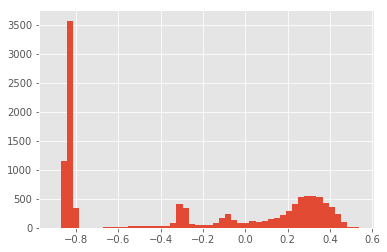

In [14]:
foo[foo.label==1]['mean'].hist(bins=50)

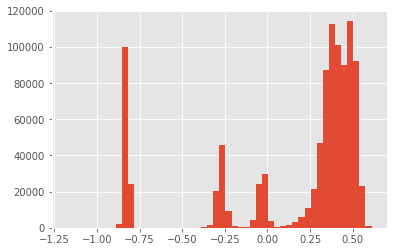

In [15]:
foo[foo.label==0]['mean'].hist(bins=50)

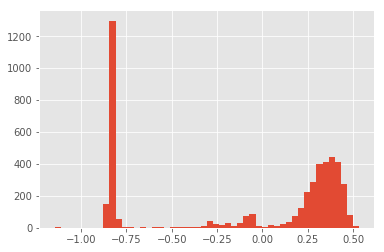

In [16]:
foo[foo.label==-1]['mean'].hist(bins=50)

In [10]:
test_df = atecml.data.load_test()
test_df['f5'] =test_df['f5']//100

a = train_df['f5'].unique()
test_df['f5'][~test_df['f5'].isin(a)] =np.nan

def mt_conv_test(feature):
    return atecml.data.woe_convert(df=test_df,feature=feature,woe_table=woe_table,type_list=type_list,category_num=num_cat)

new_feature_tt =[]
with ProcessPoolExecutor(max_workers=60) as pool:
    for pool_result in pool.map(mt_conv_test,predictors):
        new_feature_tt.append(pool_result)

nan_result = mt_conv_test('NaN_LIST')   
new_feature_tt.append(nan_result)        
        
_t_new_tt_df = pd.concat(new_feature_tt,axis=1)

_t_new_tt_df = _t_new_tt_df[filter_feature]

mean = _t_new_tt_df.mean(axis=1)
variance = _t_new_tt_df.var(axis=1)
skew = _t_new_tt_df.skew(axis=1)
_t_new_tt_df['mean'] = mean
#_t_new_tt_df['variance'] = variance
#_t_new_tt_df['skew'] = skew
_t_new_tt_df.rename(columns=rename_dict,inplace=True)
ext_tt_df = pd.concat([test_df,_t_new_tt_df],axis=1)
ext_tt_df.to_pickle('./01_test.dat')